Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost(training)= 0.204324454 cost(validation)= 0.206845596
New lowest validation error in epoch  1
Epoch: 0002 cost(training)= 0.168270767 cost(validation)= 0.167806834
New lowest validation error in epoch  2
Epoch: 0003 cost(training)= 0.150778905 cost(validation)= 0.152271673
New lowest validation error in epoch  3
Epoch: 0004 cost(training)= 0.138580039 cost(validation)= 0.138148084
New lowest validation error in epoch  4
Epoch: 0005 cost(training)= 0.131018147 cost(validation)= 0.129972085
New lowest validation error in epoch  5
Epoch: 0006 cost(training)= 0.122578830 cost(validation)= 0.121730506
New lowest validation error in epoch  6
Epoch: 0007 cost(training)= 0.118210085 cost(validation)= 0.118163817
New lowest validation error in epoch  7
Epoch: 0008 cost(training)= 0.114877962 cost(validation)= 0.

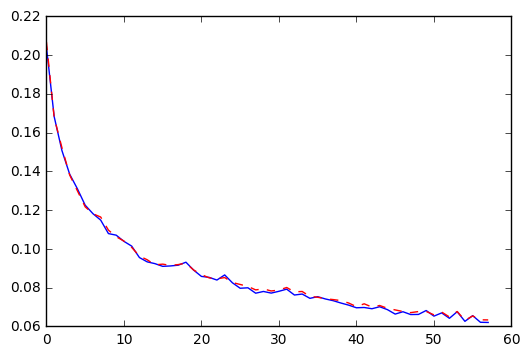

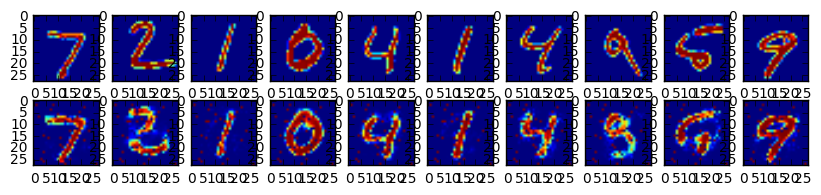

In [1]:
'''
Copyright

Jelen forráskód a Budapesti Műszaki és Gazdaságtudományi Egyetemen tartott
"Deep Learning a gyakorlatban Python és LUA alapon" tantárgy segédanyagaként készült.

A tantárgy honlapja: http://smartlab.tmit.bme.hu/oktatas-deep-learning
Deep Learning kutatás: http://smartlab.tmit.bme.hu/deep-learning

A forráskódot GPLv3 licensz védi. Újrafelhasználás esetén lehetőség szerint kérjük
az alábbi szerzőt értesíteni.

2016 (c) Csapó Tamás Gábor (csapot kukac tmit pont bme pont hu)

Original AutoEncoder example from:
Using an AutoEncoder on MNIST handwritten digits.

References:
    Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based
    learning applied to document recognition." Proceedings of the IEEE,
    86(11):2278-2324, November 1998.
Links:
    [MNIST Dataset] http://yann.lecun.com/exdb/mnist/
    [TensorFlow AutoEncoder] https://github.com/aymericdamien/TensorFlow-Examples/
                             blob/master/examples/3_NeuralNetworks/autoencoder.py
'''


### Deep Learning a gyakorlatban Python és LUA alapon - 12. hét, AutoEncoder
### Hallgatói feladatok 2016.11.24-re
### kiegészítendő részek a TODO-val jelölt részeken

# 1) Egészítsd ki a korábbi train-test szétbontást alkalmazó kódot úgy, hogy validációs 
# hibát is számítson.
# 2) Mentsd el az epochonként számolt train és validation hibát, majd a teljes tanítás 
# után ábrázold a hiba csökkenését.
# 3) Alkalmazz early stopping-ot, azaz ha az egyes epoch-ok között a validációs hiba 
# nem csökken számottevően (pl. 0.1% az előző epoch-hoz képest), akkor állítsd le a 
# tanítást.
# 4) Ellenőrizd, hogy melyik epoch-ban teljesít a legjobban a hálózat. Ha csökkent 
# a hiba, akkor mentsd el a hálózat súlyait (hogy megmaradjon a legjobb hálózat akkor 
# is, ha a hiba néhány epoch-on keresztül nem csökken).



from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# MNIST adatok betöltése
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/", one_hot=True)

# hálózat tanítási paraméterek
learning_rate = 0.01
training_epochs = 100
batch_size = 256
display_step = 1
examples_to_show = 10

# rejtett rétegek száma
n_hidden_1 = 256 # 1. (és 3.) rejtett réteg
n_hidden_2 = 128 # 2. rejtett réteg ('bottleneck')
n_input = 784 # MNIST adatok mérete (kép: 28*28)

# tf bemenet (csak képek)
X = tf.placeholder("float", [None, n_input])

# súlyok és bias
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}


# encoder rész, szigmoid aktivációs függvénnyel
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# decoder rész, szigmoid aktivációs függvénnyel
def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# modell összerakása
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# predikció
y_pred = decoder_op
# bemenet visszarakása a kimenetre
y_true = X

# loss, optimizer, MSE
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# változók inicializálása
init = tf.initialize_all_variables()

# ne foglalja le az összes GPU memóriát
config = tf.ConfigProto()
config.gpu_options.allow_growth = True


# TODO, 2a) Mentsd el az epochonként számolt train és validation hibát,
# majd a teljes tanítás után ábrázold a hiba csökkenését.
# lista változók inicializálása ide
# ...
cost_training_all = []
cost_validation_all = []
cost_validation_prev = 1.0
cost_validation_min = 1.0
best_epoch = 0

with tf.Session(config=config) as sess:
    sess.run(init)
    total_batch = int(mnist.train.num_examples/batch_size)
    # tanítási ciklus
    for epoch in range(training_epochs):
        # batch-ek
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        
        # adott epoch után log kiírása
        if epoch % display_step == 0:
            # print("Epoch:", '%04d' % (epoch+1),
                  # "cost=", "{:.9f}".format(c))
        
            # TODO, 1) Egészítsd ki a korábbi train-test szétbontást alkalmazó kódot 
            # úgy, hogy validációs hibát is számítson.
            cost_training =  sess.run(cost, feed_dict={X: batch_xs})
            cost_validation = sess.run(cost, feed_dict={X: mnist.validation.images})
            print("Epoch:", '%04d' % (epoch+1), \
                "cost(training)=", "{:.9f}".format(cost_training), \
                "cost(validation)=", "{:.9f}".format(cost_validation))
            
            
            # TODO, 2b) Mentsd el az epochonként számolt train és validation hibát, majd 
            # a teljes tanítás után ábrázold a hiba csökkenését.
            # aktuális train és validation hiba elmentése a korábbi listába
            cost_training_all += [cost_training]
            cost_validation_all += [cost_validation]
            

            # TODO, 3) Alkalmazz early stopping-ot, azaz ha az egyes epoch-ok között 
            # a validációs hiba nem csökken számottevően (pl. 0.1% az előző epoch-hoz
            # képest), akkor állítsd le a tanítást.
            # ...
            if epoch > 10 and \
                (np.abs((cost_validation - cost_validation_prev) / cost_validation) < 0.001):
                print("Validation error did not decrease, Early stopping")
                print("The best AutoEncoder network was in epoch ", best_epoch)
                break
            
            # TODO, 4) Ellenőrizd, hogy melyik epoch-ban teljesít a legjobban a hálózat. 
            # Ha csökkent a hiba, akkor mentsd el a hálózat súlyait (hogy megmaradjon 
            # a legjobb hálózat akkor is, ha a hiba néhány epoch-on keresztül nem csökken).
            # ...
            if (cost_validation < cost_validation_min):
                cost_validation_min = cost_validation
                best_epoch = (epoch + 1)
                print("New lowest validation error in epoch ", best_epoch)
                # TODO: save network
                # ...
            
            
            cost_validation_prev = cost_validation
        

    print("Optimization Finished!")

    # TODO, 2c) Mentsd el az epochonként számolt train és validation hibát, majd 
    # a teljes tanítás után ábrázold a hiba csökkenését.
    # train és validation hiba változásának kirajzolása
    e = range(len(cost_training_all))
    plt.plot(e, cost_training_all, 'b-', e, cost_validation_all, 'r--')
    plt.show()
    
    
    # Encode és decode lépés a teszt halmazon
    encode_decode = sess.run(
        y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
    # Az eredeti és a visszaállított képek összehasonlítása
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    plt.show()